<h1 style='color:rgba(200, 0, 0, 0.85);padding:40px 20px;text-align:center;font-size:45px;font-weight:bold'><center>Forbes Billionaires EDA 📊</center></h1>




# **Table of Content**
1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
5. [Exploratory Data Analysis](#section5)<br>

# <div style='color:blue;background-color:rgba(200, 0, 0, 0.85);padding:20px 20px;font-size:30px;font-weight:bold'><center>Problem Statement</center></div>

**The Aim of the project to give Data analysis on Top Billianires in the World**:

# <div style='color:white;background-color:rgba(200, 0, 0, 0.85);padding:20px 20px;font-size:30px;font-weight:bold'><center>Import Required Libraries</center></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

# <div style='color:white;background-color:rgba(200, 0, 0, 0.85);padding:20px 20px;font-size:30px;font-weight:bold'><center>Loading Data</center></div>

In [2]:
df = pd.read_csv('/content/Forbes Billionaires.csv')

In [22]:
# lets check the glimpse of first five rows of our dataframe
df.head(10)

,Rank,Name,Networth,Age,Country,Source,Industry,age_group
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive,30-50
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology,50-70
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail,70+
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology,50-70
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments,70+
5,6,Larry Page,111.0,49,United States,Google,Technology,30-50
6,7,Sergey Brin,107.0,48,United States,Google,Technology,30-50
7,8,Larry Ellison,106.0,77,United States,software,Technology,70+
8,9,Steve Ballmer,91.4,66,United States,Microsoft,Technology,50-70
9,10,Mukesh Ambani,90.7,64,India,diversified,diversified,50-70


# <div style='color:white;background-color:rgba(200, 0, 0, 0.85);padding:20px 20px;font-size:30px;font-weight:bold'><center>Data Description</center></div>

<h3 style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:20px 20px;;font-size:16px;line-height:2'>

<li>Rank: Rank of the person according to their wealth.
<li>Name: Name of the billionaires.
<li>Networth: The Net worth in all the forms included (in US Billion dollars).
<li>Age: Age of the person.
<li>Country: Country or Region, the billionaires belongs to.
<li>Source: The immediate source of their wealth (their company).
<li>Industry: Industry they are into.</h3>

In [4]:
# shape of dataframe
df.shape

(2600, 7)

In [5]:
# Getting an overview of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      2600 non-null   int64  
 1   Name      2600 non-null   object 
 2   Networth  2600 non-null   float64
 3   Age       2600 non-null   int64  
 4   Country   2600 non-null   object 
 5   Source    2600 non-null   object 
 6   Industry  2600 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 142.3+ KB


In [6]:
# summary statistics
df.describe()

,Rank,Networth,Age
count,2600.000000,2600.000000,2600.000000
mean,1269.570769,4.860750,64.271923
std,728.146364,10.659671,13.220607
min,1.000000,1.000000,19.000000
25%,637.000000,1.500000,55.000000
50%,1292.000000,2.400000,64.000000
75%,1929.000000,4.500000,74.000000
max,2578.000000,219.000000,100.000000


In [7]:
# lets check for missing values
df.isnull().sum()

Rank        0
Name        0
Networth    0
Age         0
Country     0
Source      0
Industry    0
dtype: int64

<p class="alert alert-success"style="color:black; font-size:13px; font-weight: bold; " role="alert"> No Missing values Found!! It looks like data is already pre-processed so we can jump directly to EDA.</p>

# <div style='color:white;background-color:rgba(200, 0, 0, 0.85);padding:20px 20px;font-size:30px;font-weight:bold'><center>Exploratory Data Analysis</center></div>

### <div style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:10px 10px;;font-size:25px;line-height:2'>Top 10 Countries with Most Billionaires</div>

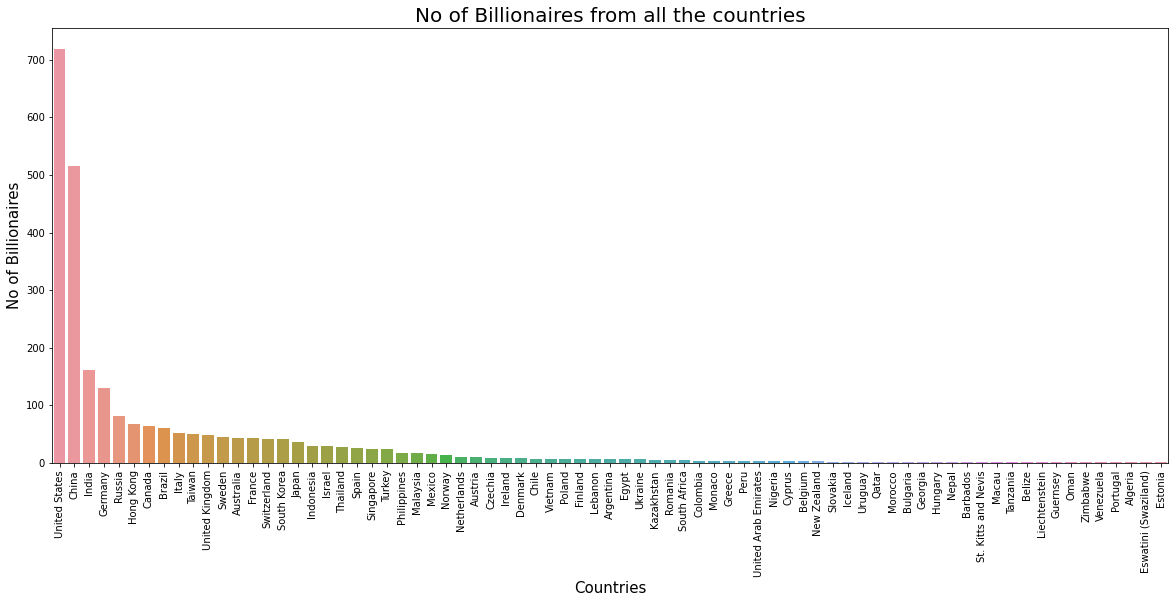

In [8]:
plt.figure(figsize=(20,8))
sns.countplot( data=df, x="Country", order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel("No of Billionaires", fontsize=15)
plt.xlabel("Countries", fontsize=15)
plt.title("No of Billionaires from all the countries", fontsize=20)
plt.show()

In [9]:
# Top 10 countries with most billionaires
df['Country'].value_counts().nlargest(10)

United States    719
China            515
India            161
Germany          130
Russia            81
Hong Kong         67
Canada            64
Brazil            60
Italy             52
Taiwan            51
Name: Country, dtype: int64

### <div style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:10px 10px;;font-size:25px;line-height:2'>Is the country with the most billionaires the one with the most wealth?</div>

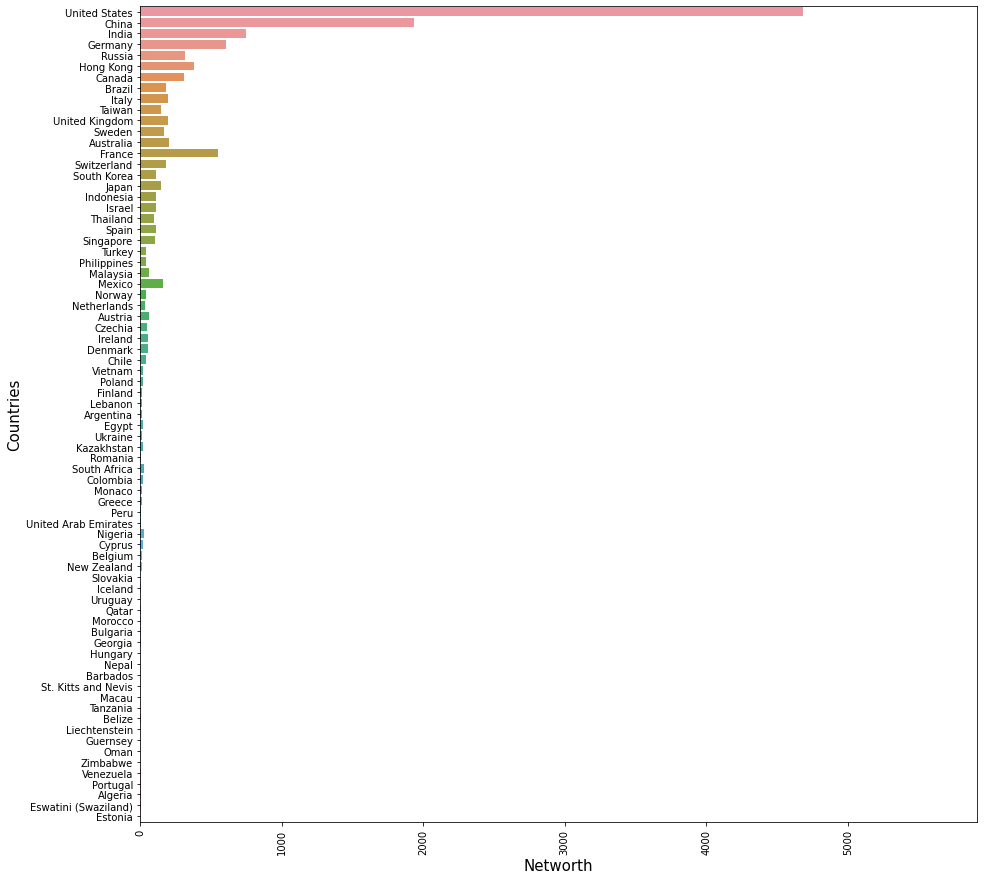

In [10]:
plt.figure(figsize=(15,15))
sns.barplot(data=df, x = "Networth", y = "Country", order = df['Country'].value_counts().index, estimator = sum , errwidth = 0)
plt.xticks(rotation=90)
plt.xlabel("Networth", fontsize=15)
plt.ylabel("Countries", fontsize=15)
plt.show()

<p class="alert alert-success"style="color:black; font-size:13px; font-weight: bold; " role="alert"> The answer seems to be yes but we can see that France has more money than countries which have more billionaires since it's sorted by the number of billionaires in the chart.</p>

### <div style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:10px 10px;;font-size:25px;line-height:2'>How old are billionairs?</div>

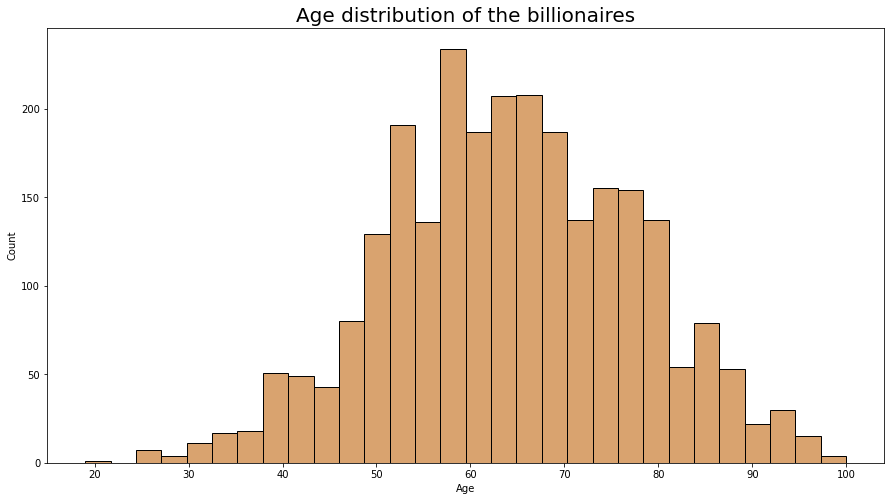

In [11]:
plt.figure(figsize = (15,8))
sns.histplot(data = df, x = 'Age', color = 'peru')
plt.title('Age distribution of the billionaires',fontsize=20)
plt.show()

<p class="alert alert-success"style="color:black; font-size:13px; font-weight: bold; " role="alert"> Most of the Billionaires belongs to 50-70 years of age group. lets check who is youngest billionaire.</p>

### <div style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:10px 10px;;font-size:25px;line-height:2'>Who is the Youngest Billionaire?</div>

In [12]:
df.loc[df.Age == df.Age.min()] 

,Rank,Name,Networth,Age,Country,Source,Industry
1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion & Retail


<p class="alert alert-success"style="color:black; font-size:13px; font-weight: bold; " role="alert"> Kevin David Lehmann is a german investor. He is best known as the son of German billionaire Guenther Lehmann, who made his fortune by investing in a drugstore. He first hit the headlines in 2021 when he turned 18 after Forbes listed him as the youngest billionaire worldwide. <a href='https://yen.com.gh/facts-lifehacks/biographies/213567-who-kevin-david-lehmann-interesting-facts-worlds-youngest-billionaire/'> Read More </a> </p>

### <div style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:10px 10px;;font-size:25px;line-height:2'>Age Group of Billionaires?</div>

In [13]:
df['age_group'] = pd.cut(df['Age'], bins = [18, 30, 50, 70, 100], include_lowest = True, labels = ['18-30', '30-50', '50-70','70+'])
df.head()

,Rank,Name,Networth,Age,Country,Source,Industry,age_group
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive,30-50
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology,50-70
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail,70+
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology,50-70
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments,70+


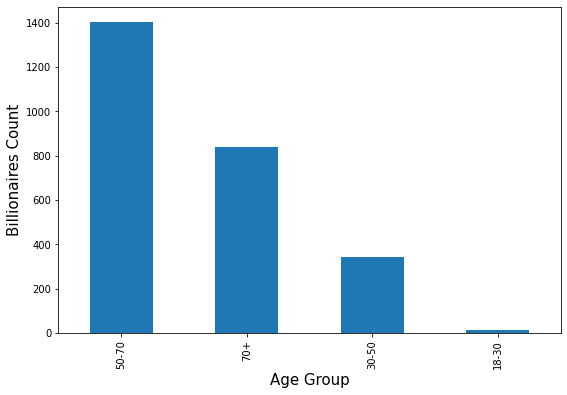

In [14]:
df['age_group'].value_counts().plot(kind='bar', figsize=(9,6))
plt.xlabel("Age Group", fontsize=15)
plt.ylabel("Billionaires Count", fontsize=15)
plt.show()

<p class="alert alert-success"style="color:black; font-size:13px; font-weight: bold; " role="alert"> Most of the Billionaires are of 50 or more than 50 years old.</p>

### <div style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:10px 10px;;font-size:25px;line-height:2'>What billionairs do?</div>

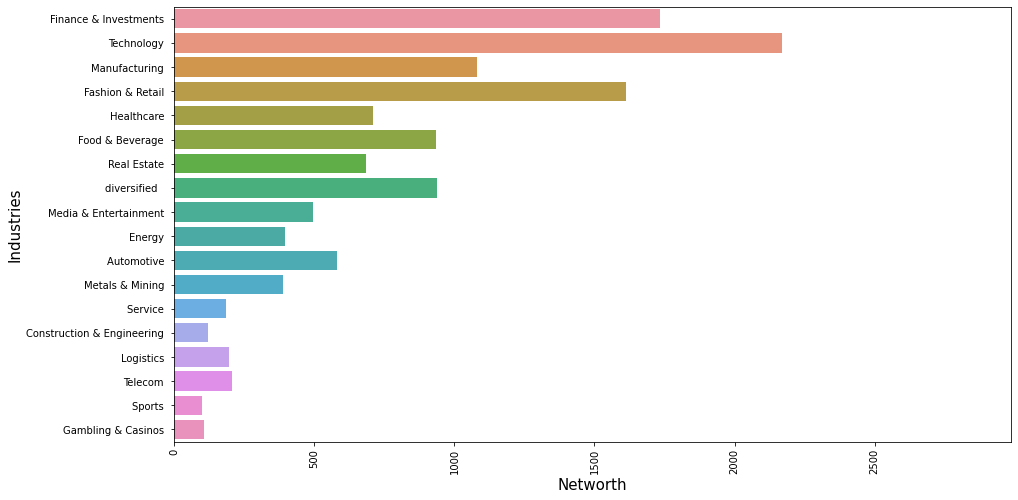

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x = "Networth", y = "Industry", order = df['Industry'].value_counts().index, estimator = sum , errwidth = 0)
plt.xticks(rotation=90)
plt.xlabel("Networth", fontsize=15)
plt.ylabel("Industries", fontsize=15)
plt.show()

### <div style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:10px 10px;;font-size:25px;line-height:2'>Where does this money come from ( Source of Billionaires ) ?</div>

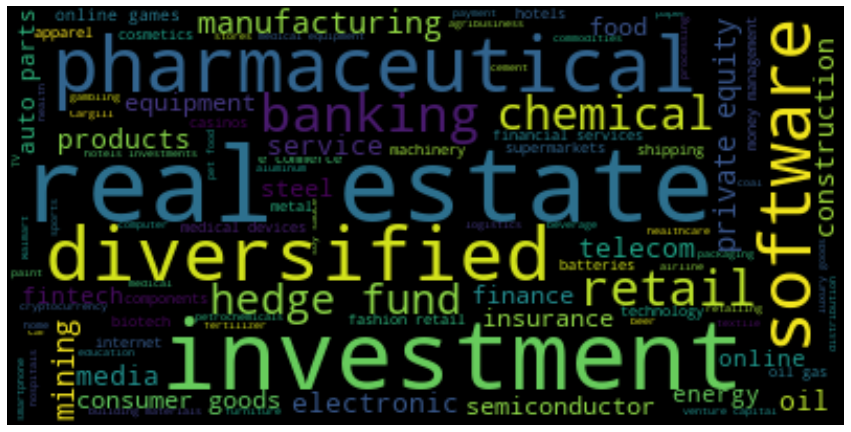

In [16]:
stopwords = set(STOPWORDS)
text = " ".join(i for i in df.Source) 

plt.figure( figsize=(15,10))
wordcloud = WordCloud(
                      stopwords=stopwords,
                      max_words=200,
                      max_font_size=50, 
                      random_state=50
                     ).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');
plt.show();.

### <div style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:10px 10px;;font-size:25px;line-height:2'>Top 5 Billionaires from India ?</div>

In [17]:
indians = df[df['Country'] == 'India']

In [18]:
top_5_indians = indians.sort_values('Networth',ascending=False).head()

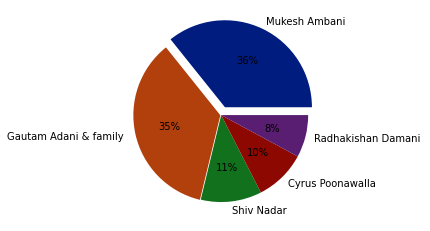

In [19]:
# declaring exploding pie
explode = [0.1, 0.01, 0, 0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
  
# plotting data on chart
plt.pie(top_5_indians['Networth'], labels=top_5_indians['Name'], colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

### <div style='color:rgb(255, 255, 255);background-color:rgba(10, 5, 5, 0.85);padding:10px 10px;;font-size:25px;line-height:2'>Top 5 Billionaires from United States ?</div>

In [20]:
us_df = df[df['Country'] == 'United States'].sort_values('Networth',ascending=False).head()
us_df

,Rank,Name,Networth,Age,Country,Source,Industry,age_group
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive,30-50
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology,50-70
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology,50-70
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments,70+
5,6,Larry Page,111.0,49,United States,Google,Technology,30-50


In [1]:
# plotting data on chart
plt.pie(us_df['Networth'], labels=us_df['Name'], colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

NameError: name 'plt' is not defined

![](http://t3.ftcdn.net/jpg/02/92/36/76/360_F_292367633_TwzHFo2XLSSbcihgxESm2sKcQ0NlwrIG.jpg)